In [1]:
import cv2
from IPython.display import display, Image

In [2]:
# img_name = "img/48_知覚データを取得する2.jpg"
# img_name = "img/37_知覚データを取得する2.jpg"
# img_name = "img/36_知覚データを取得する2.jpg"
img_name = "img/34_知覚データを取得する2.jpg"

In [3]:
img = cv2.imread(img_name)

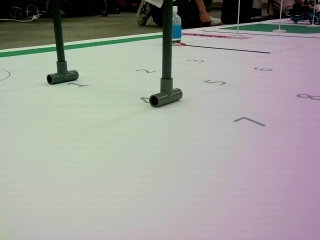

In [4]:
_, buf = cv2.imencode(".jpg", img)
display(Image(data=buf.tobytes()))

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

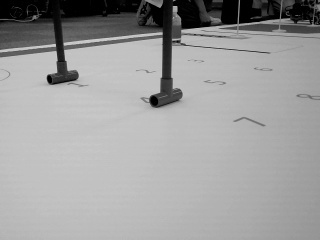

In [6]:
_, buf = cv2.imencode(".jpg", img_gray)
display(Image(data=buf.tobytes()))

In [7]:
img_filtered = cv2.GaussianBlur(img_gray, (5, 501), 0)

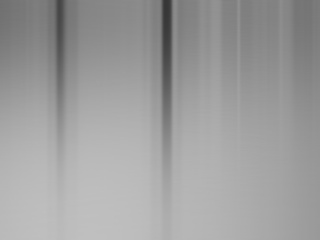

In [8]:
_, buf = cv2.imencode(".jpg", img_filtered)
display(Image(data=buf.tobytes()))

In [9]:
img_inrange = cv2.inRange(img_filtered, 100, 255)

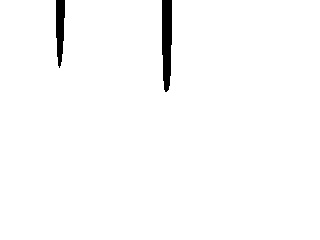

In [10]:
_, buf = cv2.imencode(".jpg", img_inrange)
display(Image(data=buf.tobytes()))

In [18]:
is_left_post_start_found = False
is_left_post_end_found = False
is_right_post_start_found = False

 # 左ポストの終了位置
# 右ポストの開始位置
# を探す
left_post_index = -1
right_post_index = -1

for i in range(img_inrange.shape[1]):
    bright = img_inrange[img_inrange.shape[0] // 4, i]
    if is_left_post_start_found == False:
        if bright > 127:
            pass
        else:
            is_left_post_start_found = True
            left_post_index = i
    elif is_left_post_end_found == False:
        if bright < 127:
            pass
        else:
            is_left_post_end_found = True
    elif is_right_post_start_found == False:
        if bright > 127:
            pass
        else:
            is_right_post_start_found = True
            right_post_index = i
    else:
        ## Nothing
        break

print(left_post_index, right_post_index)


58 163
